# Install the required Python packages

In [1]:
# Install the required Python packages
%pip install -r requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Load the dataset

In [2]:
# Import the required Python packages
import pandas as pd
import numpy as np

In [3]:
# Configure the pandas options
pd.options.display.max_colwidth = None  # To show all data in a column with truncation 

In [4]:
dataset_file_path = "./dataset/GSE2034_series_matrix.txt" # Dataset file path
platform_file_path = "./dataset/GPL96-57554.txt"          # Platform file path, for data visualization

In [5]:
# Load the series
df_gse2034_series = pd.read_csv(
    dataset_file_path,
    sep='\t',  # The dataset is tab-delimited
    nrows=24,
)
df_gse2034_series

,!Series_title,Breast cancer relapse free survival
0,!Series_geo_accession,GSE2034
1,!Series_status,Public on Feb 23 2005
2,!Series_submission_date,Dec 03 2004
3,!Series_last_update_date,Aug 10 2018
4,!Series_pubmed_id,15721472
5,!Series_summary,This series represents 180 lymph-node negative relapse free patients and 106 lymph-node negate patients that developed a distant metastasis.
6,!Series_summary,Please see attached patient clinical parameters sheet for more information.
7,!Series_summary,Keywords: other
8,!Series_type,Expression profiling by array
9,!Series_sample_id,GSM36777 GSM36778 GSM36779 GSM36780 GSM36781 GSM36782 GSM36783 GSM36784 GSM36785 GSM36786 GSM36787 GSM36788 GSM36789 GSM36790 GSM36791 GSM36792 GSM36793 GSM36794 GSM36795 GSM36796 GSM36797 GSM36798 GSM36799 GSM36800 GSM36801 GSM36802 GSM36803 GSM36804 GSM36805 GSM36806 GSM36807 GSM36808 GSM36809 GSM36810 GSM36811 GSM36812 GSM36813 GSM36814 GSM36815 GSM36816 GSM36817 GSM36818 GSM36819 GSM36820 GSM36821 GSM36822 GSM36823 GSM36824 GSM36825 GSM36826 GSM36827 GSM36828 GSM36829 GSM36830 GSM36831 GSM36832 GSM36833 GSM36834 GSM36835 GSM36836 GSM36837 GSM36838 GSM36839 GSM36840 GSM36841 GSM36842 GSM36843 GSM36844 GSM36845 GSM36846 GSM36847 GSM36848 GSM36849 GSM36850 GSM36851 GSM36852 GSM36853 GSM36854 GSM36855 GSM36856 GSM36857 GSM36858 GSM36859 GSM36860 GSM36861 GSM36862 GSM36863 GSM36864 GSM36865 GSM36866 GSM36867 GSM36868 GSM36869 GSM36870 GSM36871 GSM36872 GSM36873 GSM36874 GSM36875 GSM36876 GSM36877 GSM36878 GSM36879 GSM36880 GSM36881 GSM36882 GSM36883 GSM36884 GSM36885 GSM36886 GSM36887 GSM36888 GSM36889 GSM36890 GSM36891 GSM36892 GSM36893 GSM36894 GSM36895 GSM36896 GSM36897 GSM36898 GSM36899 GSM36900 GSM36901 GSM36902 GSM36903 GSM36904 GSM36905 GSM36906 GSM36907 GSM36908 GSM36909 GSM36910 GSM36911 GSM36912 GSM36913 GSM36914 GSM36915 GSM36916 GSM36917 GSM36918 GSM36919 GSM36920 GSM36921 GSM36922 GSM36923 GSM36924 GSM36925 GSM36926 GSM36927 GSM36928 GSM36929 GSM36930 GSM36931 GSM36932 GSM36933 GSM36934 GSM36935 GSM36936 GSM36937 GSM36938 GSM36939 GSM36940 GSM36941 GSM36942 GSM36943 GSM36944 GSM36945 GSM36946 GSM36947 GSM36948 GSM36949 GSM36950 GSM36951 GSM36952 GSM36953 GSM36954 GSM36955 GSM36956 GSM36957 GSM36958 GSM36959 GSM36960 GSM36961 GSM36962 GSM36963 GSM36964 GSM36965 GSM36966 GSM36967 GSM36968 GSM36969 GSM36970 GSM36971 GSM36972 GSM36973 GSM36974 GSM36975 GSM36976 GSM36977 GSM36978 GSM36979 GSM36980 GSM36981 GSM36982 GSM36983 GSM36984 GSM36985 GSM36986 GSM36987 GSM36988 GSM36989 GSM36990 GSM36991 GSM36992 GSM36993 GSM36994 GSM36995 GSM36996 GSM36997 GSM36998 GSM36999 GSM37000 GSM37001 GSM37002 GSM37003 GSM37004 GSM37005 GSM37006 GSM37007 GSM37008 GSM37009 GSM37010 GSM37011 GSM37012 GSM37013 GSM37014 GSM37015 GSM37016 GSM37017 GSM37018 GSM37019 GSM37020 GSM37021 GSM37022 GSM37023 GSM37024 GSM37025 GSM37026 GSM37027 GSM37028 GSM37029 GSM37030 GSM37031 GSM37032 GSM37033 GSM37034 GSM37035 GSM37036 GSM37037 GSM37038 GSM37039 GSM37040 GSM37041 GSM37042 GSM37043 GSM37044 GSM37045 GSM37046 GSM37047 GSM37048 GSM37049 GSM37050 GSM37051 GSM37052 GSM37053 GSM37054 GSM37055 GSM37056 GSM37057 GSM37058 GSM37059 GSM37060 GSM37061 GSM37062


In [6]:
# Load the sample
df_gse2034_sample = pd.read_csv(
  dataset_file_path,
  sep='\t',     # The dataset is tab-delimited
  skiprows=25,
  nrows=26
)
df_gse2034_sample

,!Sample_title,Wang4812_JA_277,Wang4813_JA_278,Wang4630_JA798@C,Wang4889_JA_846@2,Wang4857_JA_765@2,Wang4585_JA600,Wang4586_JA601,Wang4587_JA602,Wang4820_JA_605,...,Wang4572_JA264,Wang4573_JA265,Wang4574_JA267,Wang4810_JA_268,Wang4575_JA270,Wang4576_JA271,Wang4577_JA272,Wang4578_JA273,Wang4579_JA275,Wang4811_JA_276
0,!Sample_geo_accession,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,...,GSM37053,GSM37054,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062
1,!Sample_status,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,...,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005,Public on Feb 23 2005
2,!Sample_submission_date,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,...,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004,Dec 03 2004
3,!Sample_last_update_date,May 31 2013,May 31 2013,May 31 2013,May 31 2013,May 31 2013,May 31 2013,May 31 2013,May 31 2013,May 31 2013,...,Apr 02 2012,May 31 2013,May 31 2013,May 31 2013,May 31 2013,May 31 2013,May 31 2013,May 31 2013,May 31 2013,May 31 2013
4,!Sample_type,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,...,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA
5,!Sample_channel_count,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,!Sample_source_name_ch1,Breast,Breast,Breast,Breast,Breast,Breast,Breast,Breast,Breast,...,Breast,Breast,Breast,Breast,Breast,Breast,Breast,Breast,Breast,Breast
7,!Sample_organism_ch1,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,...,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens
8,!Sample_characteristics_ch1,"bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 1","bone relapses (1=yes, 0=no): 0",...,"bone relapses (1=yes, 0=no): 1","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 1","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0","bone relapses (1=yes, 0=no): 0"
9,!Sample_molecule_ch1,total RNA,total RNA,total RNA,total RNA,total RNA,total RNA,total RNA,total RNA,total RNA,...,total RNA,total RNA,total RNA,total RNA,total RNA,total RNA,total RNA,total RNA,total RNA,total RNA


In [7]:
# Transpose, to make it easier for data visualization
df_gse2034_sample_transposed = df_gse2034_sample.set_index("!Sample_title").transpose()
df_gse2034_sample_transposed

!Sample_title,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,!Sample_molecule_ch1,...,!Sample_contact_institute,!Sample_contact_address,!Sample_contact_city,!Sample_contact_state,!Sample_contact_zip/postal_code,!Sample_contact_country,!Sample_supplementary_file,!Sample_data_row_count,!Sample_relation,!Sample_relation
Wang4812_JA_277,GSM36777,Public on Feb 23 2005,Dec 03 2004,May 31 2013,RNA,1,Breast,Homo sapiens,"bone relapses (1=yes, 0=no): 0",total RNA,...,Veridex,,San Diego,CA,92121,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM36nnn/GSM36777/suppl/GSM36777.CEL.gz,22283,Reanalyzed by: GSE47561,NaN
Wang4813_JA_278,GSM36778,Public on Feb 23 2005,Dec 03 2004,May 31 2013,RNA,1,Breast,Homo sapiens,"bone relapses (1=yes, 0=no): 0",total RNA,...,Veridex,,San Diego,CA,92121,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM36nnn/GSM36778/suppl/GSM36778.CEL.gz,22283,Reanalyzed by: GSE47561,NaN
Wang4630_JA798@C,GSM36779,Public on Feb 23 2005,Dec 03 2004,May 31 2013,RNA,1,Breast,Homo sapiens,"bone relapses (1=yes, 0=no): 0",total RNA,...,Veridex,,San Diego,CA,92121,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM36nnn/GSM36779/suppl/GSM36779.CEL.gz,22283,Reanalyzed by: GSE47561,NaN
Wang4889_JA_846@2,GSM36780,Public on Feb 23 2005,Dec 03 2004,May 31 2013,RNA,1,Breast,Homo sapiens,"bone relapses (1=yes, 0=no): 0",total RNA,...,Veridex,,San Diego,CA,92121,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM36nnn/GSM36780/suppl/GSM36780.CEL.gz,22283,Reanalyzed by: GSE47561,NaN
Wang4857_JA_765@2,GSM36781,Public on Feb 23 2005,Dec 03 2004,May 31 2013,RNA,1,Breast,Homo sapiens,"bone relapses (1=yes, 0=no): 0",total RNA,...,Veridex,,San Diego,CA,92121,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM36nnn/GSM36781/suppl/GSM36781.CEL.gz,22283,Reanalyzed by: GSE47561,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wang4576_JA271,GSM37058,Public on Feb 23 2005,Dec 03 2004,May 31 2013,RNA,1,Breast,Homo sapiens,"bone relapses (1=yes, 0=no): 1",total RNA,...,Veridex,,San Diego,CA,92121,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM37nnn/GSM37058/suppl/GSM37058.CEL.gz,22283,Reanalyzed by: GSE47561,NaN
Wang4577_JA272,GSM37059,Public on Feb 23 2005,Dec 03 2004,May 31 2013,RNA,1,Breast,Homo sapiens,"bone relapses (1=yes, 0=no): 0",total RNA,...,Veridex,,San Diego,CA,92121,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM37nnn/GSM37059/suppl/GSM37059.CEL.gz,22283,Reanalyzed by: GSE47561,NaN
Wang4578_JA273,GSM37060,Public on Feb 23 2005,Dec 03 2004,May 31 2013,RNA,1,Breast,Homo sapiens,"bone relapses (1=yes, 0=no): 0",total RNA,...,Veridex,,San Diego,CA,92121,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM37nnn/GSM37060/suppl/GSM37060.CEL.gz,22283,Reanalyzed by: GSE47561,NaN
Wang4579_JA275,GSM37061,Public on Feb 23 2005,Dec 03 2004,May 31 2013,RNA,1,Breast,Homo sapiens,"bone relapses (1=yes, 0=no): 0",total RNA,...,Veridex,,San Diego,CA,92121,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM37nnn/GSM37061/suppl/GSM37061.CEL.gz,22283,Reanalyzed by: GSE47561,NaN


In [8]:
# Check sample unique values
df_gse2034_sample_transposed[[
  '!Sample_type',
  '!Sample_source_name_ch1',
  '!Sample_organism_ch1',
  '!Sample_characteristics_ch1',
  '!Sample_molecule_ch1'
]].apply(lambda column: column.unique())

!Sample_title
!Sample_type                                                                              [RNA]
!Sample_source_name_ch1                                                                [Breast]
!Sample_organism_ch1                                                             [Homo sapiens]
!Sample_characteristics_ch1    [bone relapses (1=yes, 0=no): 0, bone relapses (1=yes, 0=no): 1]
!Sample_molecule_ch1                                                                [total RNA]
dtype: object

In [9]:
# Load the dataset
df_gse2034_data = pd.read_csv(
  "./dataset/GSE2034_series_matrix.txt",
  sep='\t',     # The dataset is tab-delimited
  skiprows=54,  # Before row 55 are metadata,
)
df_gse2034_data = df_gse2034_data[:-1]    # Skip footer
df_gse2034_data

,ID_REF,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,...,GSM37053,GSM37054,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062
0,1007_s_at,3848.1,6520.9,5285.7,4043.7,4263.6,2949.8,5498.9,3863.1,3370.4,...,4058.2,4017.6,2841.0,2914.2,3681.0,3066.9,2773.0,2984.3,3540.0,2620.0
1,1053_at,228.9,112.5,178.4,398.7,417.7,221.2,280.4,198.2,304.7,...,183.4,356.1,234.6,169.4,94.5,265.5,209.8,160.0,285.7,180.5
2,117_at,213.1,189.8,269.7,312.4,327.1,225.0,243.5,244.4,348.5,...,326.6,234.9,369.6,149.5,236.4,347.9,226.7,252.9,135.1,191.8
3,121_at,1009.4,2083.3,1203.4,1104.4,1043.3,1117.6,1085.4,1423.1,1196.4,...,1041.3,1195.6,751.5,1117.8,1022.4,1127.4,1071.8,1178.5,1256.7,1284.6
4,1255_g_at,31.8,145.8,42.5,108.2,69.2,47.4,84.3,102.0,22.8,...,143.5,32.7,62.6,43.0,100.5,47.0,45.1,146.3,75.9,87.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,AFFX-ThrX-5_at,9.2,62.0,8.4,10.8,30.5,10.9,16.9,11.7,10.7,...,15.3,12.8,7.4,22.1,47.3,13.8,72.3,26.8,11.7,10.0
22279,AFFX-ThrX-M_at,25.0,21.4,7.4,16.0,22.1,9.0,3.3,47.3,29.1,...,60.2,61.4,57.1,13.9,24.5,28.8,66.2,18.0,26.4,61.9
22280,AFFX-TrpnX-3_at,4.2,9.3,7.1,4.6,7.3,4.2,2.3,6.7,3.5,...,10.8,8.5,56.6,56.8,6.9,6.6,17.8,7.1,20.4,23.7
22281,AFFX-TrpnX-5_at,7.0,11.2,64.0,12.2,5.5,32.2,36.2,86.3,12.0,...,25.7,11.1,76.7,5.5,20.9,32.1,33.1,29.5,14.5,11.9


In [10]:
# Load the platform
df_gpl96_data = pd.read_csv(
  platform_file_path,
  sep="\t",
  skiprows=16
)
df_gpl96_data

ID  GB_ACC    SPOT_ID Species Scientific Name  \
0            1007_s_at  U48705        NaN            Homo sapiens   
1              1053_at  M87338        NaN            Homo sapiens   
2               117_at  X51757        NaN            Homo sapiens   
3               121_at  X69699        NaN            Homo sapiens   
4            1255_g_at  L36861        NaN            Homo sapiens   
...                ...     ...        ...                     ...   
22278   AFFX-ThrX-5_at     NaN  --Control            Homo sapiens   
22279   AFFX-ThrX-M_at     NaN  --Control            Homo sapiens   
22280  AFFX-TrpnX-3_at     NaN  --Control            Homo sapiens   
22281  AFFX-TrpnX-5_at     NaN  --Control            Homo sapiens   
22282  AFFX-TrpnX-M_at     NaN  --Control            Homo sapiens   

      Annotation Date      Sequence Type                  Sequence Source  \
0         Oct 6, 2014  Exemplar sequence  Affymetrix Proprietary Database   
1         Oct 6, 2014  Exemplar sequence                          GenBank   
2         Oct 6, 2014  Exemplar sequence  Affymetrix Proprietary Database   
3         Oct 6, 2014  Exemplar sequence                          GenBank   
4         Oct 6, 2014  Exemplar sequence  Affymetrix Proprietary Database   
...               ...                ...                              ...   
22278     Oct 6, 2014   Control sequence  Affymetrix Proprietary Database   
22279     Oct 6, 2014   Control sequence  Affymetrix Proprietary Database   
22280     Oct 6, 2014   Control sequence  Affymetrix Proprietary Database   
22281     Oct 6, 2014   Control sequence  Affymetrix Proprietary Database   
22282     Oct 6, 2014   Control sequence  Affymetrix Proprietary Database   

                                                                                                                                                                                                                                                       Target Description  \
0                                                                                                                                                                         U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Human receptor tyrosine kinase DDR gene, complete cds   
1                                                                                                                                                                M87338 /FEATURE= /DEFINITION=HUMA1SBU Human replication factor C, 40-kDa subunit (A1) mRNA, complete cds   
2                                                                                                                                                                                            X51757 /FEATURE=cds /DEFINITION=HSP70B Human heat-shock protein HSP70B' gene   
3                                                                                                                                                                                                                X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens Pax8 mRNA   
4                                                                                                                                 L36861 /FEATURE=expanded_cds /DEFINITION=HUMGCAPB Homo sapiens guanylate cyclase activating protein (GCAP) gene exons 1-4, complete cds   
...                                                                                                                                                                                                                                                                   ...   
22278                             B. subtilis /GEN=thrC /DB_XREF=gb:X04603.1 /NOTE=SIF corresponding to nucleotides 288-932 of gb:X04603.1 /DEF=B. subtilis thrB and thrC genes for homoserine kinase and threonine synthase (EC 2.7.1.39 and EC 4.2.99.2, respectively).   
22279  B. subtilis /GEN=thrC, thrB /DB_XREF=gb:X04603.1 /NOTE=SIF corresponding to nucleotides 995-1562 of gb:X046

In [11]:
# We will use it later in Feature Selection, 1) to see and match with the literature review 2) for the betweenness centrality method
df_gpl96_data_filtered = df_gpl96_data[["ID", "Gene Symbol"]]
df_gpl96_data_filtered

,ID,Gene Symbol
0,1007_s_at,DDR1 /// MIR4640
1,1053_at,RFC2
2,117_at,HSPA6
3,121_at,PAX8
4,1255_g_at,GUCA1A
...,...,...
22278,AFFX-ThrX-5_at,NaN
22279,AFFX-ThrX-M_at,NaN
22280,AFFX-TrpnX-3_at,NaN
22281,AFFX-TrpnX-5_at,NaN


In [12]:
# The dataset's rows represent each gene expression values and the columns represent each patient
# Transpose it, so it is easier to process with the pandas package
df_gse2034_data_transposed = df_gse2034_data.set_index("ID_REF").transpose()
df_gse2034_data_transposed

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM36777,3848.1,228.9,213.1,1009.4,31.8,551.5,176.7,11.9,309.3,49.9,...,619.9,661.5,33168.9,25644.4,11.1,9.2,25.0,4.2,7.0,10.0
GSM36778,6520.9,112.5,189.8,2083.3,145.8,802.8,278.4,28.3,449.0,122.9,...,511.3,716.1,54401.4,40720.0,17.1,62.0,21.4,9.3,11.2,15.7
GSM36779,5285.7,178.4,269.7,1203.4,42.5,557.5,183.3,56.4,101.9,85.9,...,1618.4,1189.3,61244.1,50878.7,6.4,8.4,7.4,7.1,64.0,4.1
GSM36780,4043.7,398.7,312.4,1104.4,108.2,568.5,187.7,42.1,899.1,90.7,...,780.5,801.1,62292.1,46870.8,13.5,10.8,16.0,4.6,12.2,7.3
GSM36781,4263.6,417.7,327.1,1043.3,69.2,653.2,185.8,21.8,3629.3,96.0,...,276.0,191.1,57295.1,40847.1,19.8,30.5,22.1,7.3,5.5,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM37058,3066.9,265.5,347.9,1127.4,47.0,583.9,138.2,16.1,577.3,44.7,...,346.6,444.5,57830.1,43122.0,10.4,13.8,28.8,6.6,32.1,5.4
GSM37059,2773.0,209.8,226.7,1071.8,45.1,859.9,121.0,24.8,935.6,78.8,...,538.9,330.3,50140.4,39033.8,33.1,72.3,66.2,17.8,33.1,3.7
GSM37060,2984.3,160.0,252.9,1178.5,146.3,664.2,183.3,49.6,443.5,74.0,...,425.5,532.4,69320.3,58585.2,28.9,26.8,18.0,7.1,29.5,10.7
GSM37061,3540.0,285.7,135.1,1256.7,75.9,603.1,125.0,72.9,73.5,126.1,...,247.5,188.0,48495.6,38360.8,10.1,11.7,26.4,20.4,14.5,4.0


In [13]:
# Combine the '!Sample_characteristics_ch1' column to the dataset
df_gse2034_data_transposed_target = df_gse2034_data_transposed.copy()
df_gse2034_data_transposed_target['!Sample_characteristics_ch1'] = [
    1 if status.endswith("1")
    else 0 if status.endswith("0")
    else np.nan
    for status in df_gse2034_sample_transposed['!Sample_characteristics_ch1']
]
df_gse2034_data_transposed_target

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,!Sample_characteristics_ch1
GSM36777,3848.1,228.9,213.1,1009.4,31.8,551.5,176.7,11.9,309.3,49.9,...,661.5,33168.9,25644.4,11.1,9.2,25.0,4.2,7.0,10.0,0
GSM36778,6520.9,112.5,189.8,2083.3,145.8,802.8,278.4,28.3,449.0,122.9,...,716.1,54401.4,40720.0,17.1,62.0,21.4,9.3,11.2,15.7,0
GSM36779,5285.7,178.4,269.7,1203.4,42.5,557.5,183.3,56.4,101.9,85.9,...,1189.3,61244.1,50878.7,6.4,8.4,7.4,7.1,64.0,4.1,0
GSM36780,4043.7,398.7,312.4,1104.4,108.2,568.5,187.7,42.1,899.1,90.7,...,801.1,62292.1,46870.8,13.5,10.8,16.0,4.6,12.2,7.3,0
GSM36781,4263.6,417.7,327.1,1043.3,69.2,653.2,185.8,21.8,3629.3,96.0,...,191.1,57295.1,40847.1,19.8,30.5,22.1,7.3,5.5,11.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM37058,3066.9,265.5,347.9,1127.4,47.0,583.9,138.2,16.1,577.3,44.7,...,444.5,57830.1,43122.0,10.4,13.8,28.8,6.6,32.1,5.4,1
GSM37059,2773.0,209.8,226.7,1071.8,45.1,859.9,121.0,24.8,935.6,78.8,...,330.3,50140.4,39033.8,33.1,72.3,66.2,17.8,33.1,3.7,0
GSM37060,2984.3,160.0,252.9,1178.5,146.3,664.2,183.3,49.6,443.5,74.0,...,532.4,69320.3,58585.2,28.9,26.8,18.0,7.1,29.5,10.7,0
GSM37061,3540.0,285.7,135.1,1256.7,75.9,603.1,125.0,72.9,73.5,126.1,...,188.0,48495.6,38360.8,10.1,11.7,26.4,20.4,14.5,4.0,0


In [14]:
# Check the data types: The data types are correct
df_gse2034_data_transposed_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, GSM36777 to GSM37062
Columns: 22284 entries, 1007_s_at to !Sample_characteristics_ch1
dtypes: float64(22283), int64(1)
memory usage: 48.6+ MB


In [15]:
# Check for rows with null values: No rows with null values
df_gse2034_data_transposed_target.isna().values.any()

np.False_

# The dataset characteristics

In [16]:
# Based on the target, generate the hitogram to show the data category
df_gse2034_data_transposed_target['!Sample_characteristics_ch1'].value_counts()

!Sample_characteristics_ch1
0    217
1     69
Name: count, dtype: int64

In [17]:
# Calculate summary statistics
df_gse2034_data_transposed_target.drop(columns=['!Sample_characteristics_ch1']).describe()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,3720.149301,233.533217,260.382168,1125.082517,62.314685,699.205245,192.737413,45.405944,1120.896503,86.963986,...,515.121678,489.185315,49788.876224,39774.471329,15.175874,16.275175,27.545804,13.577273,20.983566,7.606643
std,1206.822098,108.125407,193.138482,311.108100,32.305167,250.893952,63.734726,37.099651,1537.051839,35.117032,...,291.646042,269.727115,21084.653232,16467.661379,10.453554,13.203688,19.298486,14.438200,19.832549,5.326260
min,596.500000,13.100000,80.700000,598.300000,6.600000,316.200000,59.000000,5.900000,9.900000,7.500000,...,28.600000,75.100000,15415.300000,14121.000000,3.700000,2.700000,2.300000,1.500000,2.700000,1.700000
25%,2897.625000,169.425000,181.600000,922.350000,37.900000,515.875000,149.675000,19.275000,266.125000,61.750000,...,339.750000,318.600000,33646.025000,26816.575000,9.800000,9.700000,11.400000,4.525000,9.025000,4.900000
50%,3567.000000,219.250000,235.300000,1073.050000,61.850000,668.600000,181.050000,30.500000,567.850000,82.800000,...,461.300000,414.100000,47726.750000,37464.200000,12.600000,12.300000,22.250000,7.300000,12.700000,6.500000
75%,4250.375000,284.600000,295.175000,1255.025000,82.875000,816.175000,227.325000,64.450000,1236.125000,108.475000,...,626.275000,633.575000,62127.000000,47842.150000,16.775000,17.500000,39.525000,17.075000,27.875000,9.100000
max,8881.800000,848.800000,2985.300000,2478.200000,192.600000,1809.500000,474.600000,249.100000,10131.100000,212.600000,...,2180.000000,1856.900000,146868.800000,115944.200000,81.100000,93.700000,109.100000,86.000000,119.500000,60.600000


<Axes: ylabel='Frequency'>

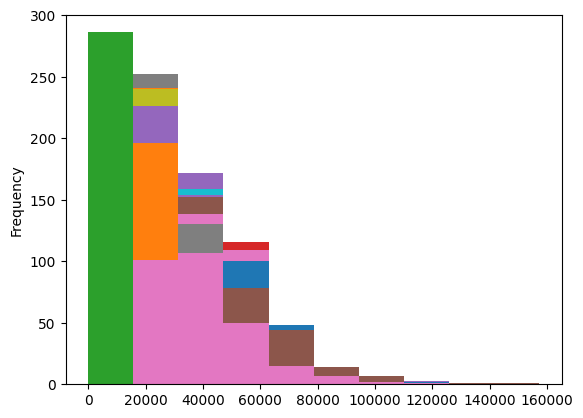

In [18]:
# Based on the features, generate the histogram to show the distribution of the data
df_gse2034_data_transposed_target.drop(columns=["!Sample_characteristics_ch1"]).plot(kind="hist", legend=None)

<Axes: ylabel='Density'>

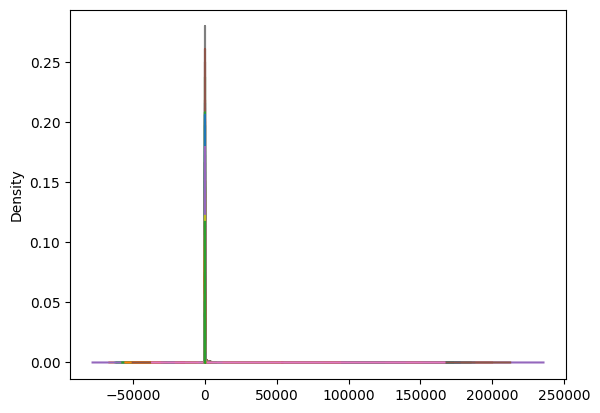

In [19]:
# Based on the features, generate the kernel density estimate (KDE) plot to estimate the probability density function (PDF) of a random variable
df_gse2034_data_transposed_target.drop(columns=["!Sample_characteristics_ch1"]).plot(kind="kde", legend=None)

### Discussion

According to the summary statistics, histogram, and the kernel density estimation (KDE) plot, the data distribution is not a normal distribution. We can standardize the dataset to have a mean of 0 and a standard deviation of 1

According to the author, there were 286 patients, of which 180 patients (Based on analysis, 217 patients) did not experience cancer relapse and 106 patients (Based on analysis, 69 patients) experienced cancer relapse. We can conclude that the dataset is imbalanced. We can do oversampling, but because I am not an expert in this domain, I will not do oversampling

Based on the dataset characteristics, the following tasks are created:
1. [ ] To oversample the training set
   - Result: Skipped because I do not have the domain knowledge of gene expression
2. [x] To standardize the features

# Data Preprocessing

In [20]:
# Import the required Python packages
from sklearn.model_selection import train_test_split

In [21]:
# Split the dataset into X for features and y for target
X = df_gse2034_data_transposed_target.drop(['!Sample_characteristics_ch1'], axis='columns')
y = df_gse2034_data_transposed_target['!Sample_characteristics_ch1'].copy()

In [22]:
# Split the dataset into training set and testing set with 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection

Reference:
1. [2016-Computational Biology Chemistry-Comparison among dimensionality reduction techniques based on Random Projection for cancer classification](https://www.sciencedirect.com/science/article/abs/pii/S1476927116304108)

In [23]:
# Import the required Python packages
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from scipy.stats import ttest_ind

In [24]:
# Feature Selection using the chi-squared stats, p-value lower than 0.05
chi2_stats, p_values = chi2(X_train, y_train)
chi2_stats, p_values
df_chi2 = pd.DataFrame(
    data={
        "ID_REF": X_train.columns,
        "chi2 stats": chi2_stats,
        "p-values": p_values
    }
)
df_chi2 = df_chi2.merge(df_gpl96_data_filtered, left_on="ID_REF", right_on="ID")
df_chi2 = df_chi2.drop(columns=["ID"])
df_chi2 = df_chi2.reindex(columns=["ID_REF", "Gene Symbol", "chi2 stats", "p-values"])
df_chi2[df_chi2["p-values"] < 0.05].sort_values(ascending=False, by="chi2 stats")

,ID_REF,Gene Symbol,chi2 stats,p-values
14494,215121_x_at,CYAT1 /// IGLC1 /// IGLV1-44,406661.673596,0.000000
8631,209138_x_at,IGLC1,312794.731355,0.000000
10839,211430_s_at,IGHG1 /// IGHG2 /// IGHM /// IGHV4-31 /// MIR8071-1 /// MIR8071-2,291824.489548,0.000000
5035,205509_at,CPB1,242504.202311,0.000000
14752,215379_x_at,IGLV1-44,238520.740427,0.000000
...,...,...,...,...
1700,202173_s_at,VEZF1,3.852487,0.049672
1583,202056_at,KPNA1,3.851488,0.049702
4829,205303_at,KCNJ8,3.847479,0.049821
14151,214776_x_at,XYLB,3.844679,0.049904


In [25]:
# Feature Selection using the ANOVA F-value, p-value lower than 0.05
f_statistic, p_values = f_classif(X_train, y_train)
df_f_classif = pd.DataFrame(
    data={
        "ID_REF": X_train.columns,
        "F-statistic": f_statistic,
        "p-values": p_values
    }
)
df_f_classif = df_f_classif.merge(df_gpl96_data_filtered, left_on="ID_REF", right_on="ID")
df_f_classif = df_f_classif.drop(columns=["ID"])
df_f_classif = df_f_classif.reindex(columns=["ID_REF", "Gene Symbol", "F-statistic", "p-values"])
df_f_classif[df_f_classif["p-values"] < 0.05].sort_values(ascending=False, by="F-statistic")

,ID_REF,Gene Symbol,F-statistic,p-values
21760,32088_at,BLZF1,27.374136,3.821340e-07
20586,221224_s_at,DCAKD,26.988741,4.565357e-07
9316,209831_x_at,DNASE2,24.649975,1.354080e-06
12284,212900_at,SEC24A,23.249502,2.613458e-06
6161,206636_at,RASA2,20.531824,9.502245e-06
...,...,...,...,...
9780,210301_at,XDH,3.886848,4.988566e-02
6301,206776_x_at,ACRV1,3.884499,4.995425e-02
17952,218588_s_at,FAM114A2,3.883595,4.998068e-02
18421,219058_x_at,TINAGL1,3.883255,4.999063e-02


In [26]:
# Feature Selection using the mutual information, p-value lower than 0.05
mi = mutual_info_classif(X_train, y_train, random_state=42)
df_mi = pd.DataFrame(
    data={
        "ID_REF": X_train.columns,
        "Mutual Information": mi,
    }
)
df_mi = df_mi.merge(df_gpl96_data_filtered, left_on="ID_REF", right_on="ID")
df_mi = df_mi.drop(columns=["ID"])
df_mi = df_mi.reindex(columns=["ID_REF", "Gene Symbol", "Mutual Information"])
df_mi.sort_values(ascending=False, by="Mutual Information").head(int(len(df_mi) * 0.2)) # Top 20

,ID_REF,Gene Symbol,Mutual Information
7906,208406_s_at,GRAP2,0.134443
4945,205419_at,GPR183,0.130609
11395,212009_s_at,STIP1,0.121943
6340,206815_at,SPAG8,0.119075
14861,215489_x_at,HOMER3,0.114699
...,...,...,...
680,201153_s_at,MBNL1,0.026047
13209,213830_at,YME1L1,0.026045
17917,218553_s_at,KCTD15,0.026041
3159,203633_at,CPT1A,0.026036


In [27]:
# Feature Selection using t-test, p-value lower than 0.05
df_ttest = {
  "ID_REF": [],
  "statistic": [],
  "pvalue": []
}

for feature in X_train.columns:
  statistic, pvalue = ttest_ind(X_train[feature][y_train == 0], X_train[feature][y_train == 1], equal_var=False)
  df_ttest["ID_REF"].append(feature)
  df_ttest["statistic"].append(statistic)
  df_ttest["pvalue"].append(pvalue)

df_ttest = pd.DataFrame(data=df_ttest)
df_ttest = df_ttest.merge(df_gpl96_data_filtered, left_on="ID_REF", right_on="ID")
df_ttest = df_ttest.drop(columns=["ID"])
df_ttest = df_ttest.reindex(columns=["ID_REF", "Gene Symbol", "statistic", "pvalue"])
df_ttest[df_ttest["pvalue"] < 0.05].sort_values(ascending=False, by="statistic")

,ID_REF,Gene Symbol,statistic,pvalue
20586,221224_s_at,DCAKD,6.245746,4.371676e-09
9316,209831_x_at,DNASE2,6.119920,7.342633e-09
22236,AFFX-HUMISGF3A/M97935_MA_at,STAT1,5.857223,1.660930e-08
18150,218787_x_at,CWF19L1,5.515984,1.144854e-07
6161,206636_at,RASA2,5.503945,1.575826e-07
...,...,...,...,...
17449,218085_at,CHMP5,-3.985222,1.403020e-04
9022,209530_at,CACNB3,-4.060138,9.783281e-05
21589,222230_s_at,ACTR10,-4.178127,6.791751e-05
12284,212900_at,SEC24A,-4.674959,9.853388e-06


In [56]:
# Feature Selection using the betweenness centrality
top_34_genes_by_betweenness_centrality = ["UBC", "FN1", "XPO1", "PCNA", "YWHAE", "CSNK2B", "ACTB", "CUL2", "HNRNPA1", "COL1A1", "TUBA1A", "ILK", "TMEM109", "VAPA", "PCBP1", "BUB1", "COL5A1", "PSMA7", "SSR4", "SCRIB", "HSPA5", "TNNT1", "TUBB", "DOLPP1", "PMM1", "DCUN1D1", "GAPVD1", "SEC61B", "AURKA", "EZH2", "RASA1", "SATB2", "JAK2", "RPL26L1"]
top_34_id_refs_by_betweenness_centrality = df_gpl96_data_filtered[df_gpl96_data_filtered["Gene Symbol"].isin(top_34_genes_by_betweenness_centrality)]["ID"].values.tolist()
top_34_id_refs_by_betweenness_centrality
betweenness_centrality_mask = df_gse2034_data_transposed_target.drop(columns=["!Sample_characteristics_ch1"]).columns.tolist()
betweenness_centrality_mask = pd.DataFrame(data={
    "ID_REF": betweenness_centrality_mask,
})
betweenness_centrality_mask["top_34"] = betweenness_centrality_mask.isin(top_34_id_refs_by_betweenness_centrality)
betweenness_centrality_mask_list = betweenness_centrality_mask["top_34"]
betweenness_centrality_mask_list

0        False
1        False
2        False
3        False
4        False
         ...  
22278    False
22279    False
22280    False
22281    False
22282    False
Name: top_34, Length: 22283, dtype: bool

# Feature Scaling

Note:
1. There is no code because we use sklearn.pipeline.Pipeline

# Model Definition

Reference:
1. [Feature selection with Pipeline and GridSearchCV](https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py)
2. [The effect of different scalers on data with outliers](https://scikit-learn.org/dev/auto_examples/preprocessing/plot_all_scaling.html#standardscaler)

In [29]:
# Import the required Python packages
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.feature_selection import SelectorMixin
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import make_scorer, f1_score

In [30]:
# Define the pipeline
pipe = Pipeline([
    ('1st', 'passthrough'),                           # either for feature selection or feature scaling
    ('2nd', 'passthrough'),                           # either for feature selection or feature scaling
    ('classify', LogisticRegression(random_state=42))
])
pipe

Pipeline(steps=[('1st', 'passthrough'), ('2nd', 'passthrough'),
                ('classify', LogisticRegression(random_state=42))])

In [31]:
# Define the feature selection transformer
class SelectPValue(SelectorMixin, BaseEstimator):
  """
  Parameters
  ----------
  score_func : callable, default=f_classif
    Function taking two arrays X and y, and returning a pair of arrays
    (scores, pvalues) or a single array with scores.
    Default is f_classif (see below "See Also"). The default function only
    works with classification tasks.

  threshold : float, default=0.05
    Features with p-values less than `threshold` are selected.

  See Also
  --------
  f_classif : ANOVA F-value between label/feature for classification tasks.
  mutual_info_classif : Mutual information for a discrete target.
  """
  def __init__(self, score_func=f_classif, threshold=0.05):
    self.score_func = score_func
    self.threshold = threshold

  def fit(self, X, y=None):
    self.feature_names_in_ = X.columns.values             # No idea whether this is a hack or an actual way to suppress the UserWarning
    self.n_features_in = X.shape[1]
    self.scores_, self.pvalues_ = self.score_func(X, y)
    return self
  
  def _get_support_mask(self):
    return self.pvalues_ <= self.threshold

In [32]:
# Define the feature selection transformer
class SelectTopPercentile(SelectorMixin, BaseEstimator):
  """
  Select features according to a percentile of the highest scores.

  Similar to SelectPercentile
  mutual_info_classif have additional parameter "random_state"
  without it, the result is not reproducible

  Parameters
  ----------
  score_func : callable, default=f_classif
      Function taking two arrays X and y, and returning a single array with scores.
      Default is mutual_info_classif (see below "See Also"). The default function only
      works with classification tasks.

  top : float, default=0.2
      Percent of features to keep.

  See Also
  --------
    mutual_info_classif : Mutual information for a discrete target.
  """
  def __init__(self, score_func=mutual_info_classif, top=0.2):
    self.score_func = score_func
    self.top = top

  def fit(self, X, y=None):
    self.feature_names_in_ = X.columns.values             # No idea whether this is a hack or an actual way to suppress the UserWarning
    self.n_features_in = X.shape[1]
    self.scores_ = self.score_func(X, y, random_state=42)
    return self
  
  def _get_support_mask(self):
    scores = np.sort(self.scores_)[::-1] # [::-1] descending
    threshold = scores[int(len(scores) * self.top) - 1]
    return self.scores_ >= threshold
    

In [33]:
# Feature Selection with t-test
class SelectTTestInd(SelectorMixin, BaseEstimator):
  """
  Parameters
  ----------
  threshold : float, default=0.05
    Features with p-values less than `threshold` are selected.
  """

  def __init__(self, threshold=0.05):
    self.score_func = ttest_ind
    self.threshold = threshold

  def fit(self, X, y=None):
    self.feature_names_in_ = X.columns.values             # No idea whether this is a hack or an actual way to suppress the UserWarning
    self.n_features_in = X.shape[1]

    statistics, pvalues = self.score_func(X[y == 0], X[y == 1], equal_var=False)
    self.scores_ = pd.DataFrame(data={
      "Feature Name": X.columns.values,
      "statistics": statistics,
      "pvalues": pvalues,
    })
    return self
  
  def _get_support_mask(self):
    return (self.scores_["pvalues"] < 0.05).values

In [57]:
class SelectBetweennessCentrality(SelectorMixin, BaseEstimator):
  def __init__(self):
    self._support_mask_ = betweenness_centrality_mask_list

  def fit(self, X, y=None):
    self.feature_names_in_ = X.columns.values          # No idea whether this is a hack or an actual way to suppress the UserWarning
    self.n_features_in = X.shape[1]

    return self
  
  def _get_support_mask(self):
    return self._support_mask_.values

In [58]:
# Define the parameter grid
REDUCER_LABELS = ["f_classif", "mutual_info_classif", "chi2", "t-test", "Between Centrality"]
SCALER_OPTIONS = ["passthrough", MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()]
SCALER_LABELS = ["no scaling", "MinMaxScaler", "StandardSclaer", "RobustScaler", "QuantileTransformer"]
SOLVER_OPTIONS = ["liblinear"]
PENALTY_OPTIONS = ["l1", "l2"]
C_OPTIONS = [0.1, 1, 10]

param_grid = [
  {
    '1st': [
      SelectPValue(score_func=f_classif, threshold=0.05),
      SelectTopPercentile(score_func=mutual_info_classif, top=0.2),
      SelectPValue(score_func=chi2, threshold=0.05),
      SelectTTestInd(threshold=0.05),
      SelectBetweennessCentrality(),
    ],
    '2nd': SCALER_OPTIONS,
    'classify__solver': SOLVER_OPTIONS,
    'classify__penalty': PENALTY_OPTIONS,
    'classify__C': C_OPTIONS,
  },
]
param_grid

[{'1st': [SelectPValue(),
   SelectTopPercentile(),
   SelectPValue(score_func=<function chi2 at 0x3f00511b0>),
   SelectTTestInd(),
   SelectBetweennessCentrality()],
  '2nd': ['passthrough',
   MinMaxScaler(),
   StandardScaler(),
   RobustScaler(),
   QuantileTransformer()],
  'classify__solver': ['liblinear'],
  'classify__penalty': ['l1', 'l2'],
  'classify__C': [0.1, 1, 10]}]

In [59]:
# Make scoring
# It is important for the model to be able to detect breast cancer relapse
# In other words, the cost of predicting a patient with "bone relapse" as "no bone relapse" (false negative) is high
# Reference: https://stackoverflow.com/questions/44172162/f1-score-vs-roc-auc
SCORER = make_scorer(f1_score, average="binary", pos_label=1)
SCORER_LABEL = "F1 Score binary pos_label=1"

# Use GridSearchCV to make life easier
grid = GridSearchCV(
  pipe,
  n_jobs=-1,
  param_grid=param_grid,
  scoring=SCORER)
grid

GridSearchCV(estimator=Pipeline(steps=[('1st', 'passthrough'),
                                       ('2nd', 'passthrough'),
                                       ('classify',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'1st': [SelectPValue(), SelectTopPercentile(),
                                  SelectPValue(score_func=<function chi2 at 0x3f00511b0>),
                                  SelectTTestInd(),
                                  SelectBetweennessCentrality()],
                          '2nd': ['passthrough', MinMaxScaler(),
                                  StandardScaler(), RobustScaler(),
                                  QuantileTransformer()],
                          'classify__C': [0.1, 1, 10],
                          'classify__penalty': ['l1', 'l2'],
                          'classify__solver': ['liblinear']}],
             scoring=make_scorer(f1_score, response_method='predict', average=binary, pos_label=1))

# Model Training

In [62]:
# Train the model
grid.fit(X_train, y_train)

/Users/jason/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (182). n_quantiles is set to n_samples.
  warnings.warn(
/Users/jason/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (182). n_quantiles is set to n_samples.
  warnings.warn(
/Users/jason/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (182). n_quantiles is set to n_samples.
  warnings.warn(
/Users/jason/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (183). n_quantiles is set to n_samples.
  warnings.warn(
/Users/jason/.pyenv/versions/3.10.14/lib/python3.10/site

GridSearchCV(estimator=Pipeline(steps=[('1st', 'passthrough'),
                                       ('2nd', 'passthrough'),
                                       ('classify',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'1st': [SelectPValue(), SelectTopPercentile(),
                                  SelectPValue(score_func=<function chi2 at 0x3f00511b0>),
                                  SelectTTestInd(),
                                  SelectBetweennessCentrality()],
                          '2nd': ['passthrough', MinMaxScaler(),
                                  StandardScaler(), RobustScaler(),
                                  QuantileTransformer()],
                          'classify__C': [0.1, 1, 10],
                          'classify__penalty': ['l1', 'l2'],
                          'classify__solver': ['liblinear']}],
             scoring=make_scorer(f1_score, response_method='predict', average=binary, pos_label=1))

# GridSearchCV Evaluation

In [61]:
# Import the required Python packages
import matplotlib.pyplot as plt

In [63]:
# Check how the test is performed
grid.cv_results_["params"]

[{'1st': SelectPValue(),
  '2nd': 'passthrough',
  'classify__C': 0.1,
  'classify__penalty': 'l1',
  'classify__solver': 'liblinear'},
 {'1st': SelectPValue(),
  '2nd': 'passthrough',
  'classify__C': 0.1,
  'classify__penalty': 'l2',
  'classify__solver': 'liblinear'},
 {'1st': SelectPValue(),
  '2nd': 'passthrough',
  'classify__C': 1,
  'classify__penalty': 'l1',
  'classify__solver': 'liblinear'},
 {'1st': SelectPValue(),
  '2nd': 'passthrough',
  'classify__C': 1,
  'classify__penalty': 'l2',
  'classify__solver': 'liblinear'},
 {'1st': SelectPValue(),
  '2nd': 'passthrough',
  'classify__C': 10,
  'classify__penalty': 'l1',
  'classify__solver': 'liblinear'},
 {'1st': SelectPValue(),
  '2nd': 'passthrough',
  'classify__C': 10,
  'classify__penalty': 'l2',
  'classify__solver': 'liblinear'},
 {'1st': SelectPValue(),
  '2nd': MinMaxScaler(),
  'classify__C': 0.1,
  'classify__penalty': 'l1',
  'classify__solver': 'liblinear'},
 {'1st': SelectPValue(),
  '2nd': MinMaxScaler(),
  '

Best score: 0.5294133459835547
Best params: {'1st': SelectPValue(score_func=<function chi2 at 0x3f00511b0>), '2nd': StandardScaler(), 'classify__C': 0.1, 'classify__penalty': 'l2', 'classify__solver': 'liblinear'}


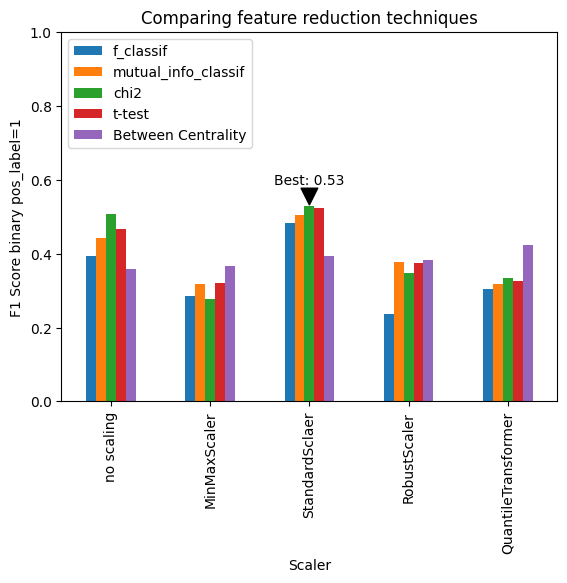

In [64]:
mean_scores = np.array(grid.cv_results_["mean_test_score"])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(REDUCER_LABELS), len(SCALER_OPTIONS), len(SOLVER_OPTIONS), len(PENALTY_OPTIONS),len(C_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=4) # matrix 5(axis=0)x4(axis=1)x1(axis=2)x2(axis=3)x3(axis=4)
mean_scores = mean_scores.max(axis=3) # matrix 5(axis=0)x4(axis=1)x1(axis=2)x2(axis=3)
mean_scores = mean_scores.max(axis=2) # matrix 5(axis=0)x4(axis=1)x1(axis=2)
# create a dataframe to ease plotting
mean_scores = pd.DataFrame(
    mean_scores.T,
    index=SCALER_LABELS,
    columns=REDUCER_LABELS
)
ax = mean_scores.plot.bar()
ax.set_title("Comparing feature reduction techniques")
ax.set_xlabel("Scaler")
ax.set_ylabel(SCORER_LABEL)
ax.set_ylim((0,1))
ax.legend(loc="upper left")

# Add a marker for the best score
# Find the best score and its location
best_scaler, best_reduction = np.unravel_index(mean_scores.values.argmax(), mean_scores.shape)
best_score_value = mean_scores.values[best_scaler, best_reduction]

# Annotate the best score
bar_x_center_positions = []
for p in ax.patches:
  bar_x_center_positions.append(p.get_x() + p.get_width() / 2)
x_position = bar_x_center_positions[mean_scores.values.flatten("F").argmax()]
ax.annotate(f'Best: {best_score_value:.2f}', 
            xy=(x_position, best_score_value),                # Position of the annotation (x: column, y: score)
            xytext=(x_position, best_score_value + 0.05),     # Slightly above the bar
            arrowprops=dict(facecolor='black', shrink=0.05),  # Arrow styling
            ha='center', va='bottom')                         # Aligning text

print(f"Best score: {grid.best_score_}")
print(f"Best params: {grid.best_params_}")

plt.show()

# Model Evaluation

In [65]:
# Importh the required Python packages
from joblib import dump, load
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, auc, RocCurveDisplay

In [66]:
# Save model
with open("model/best_estimator.joblib", "wb") as f:
  dump(grid.best_estimator_, f)

In [67]:
# Load model
with open("model/best_estimator.joblib", "rb") as f:
  clf = load(f)

In [68]:
# To predict
y_test_pred = clf.predict(X=X_test)

F1 Score: 0.48484848484848486


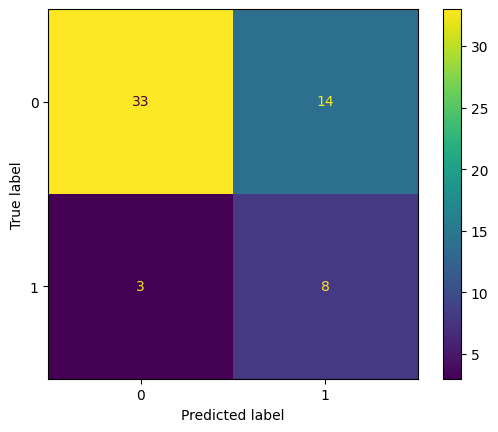

              precision    recall  f1-score   support

           0       0.92      0.70      0.80        47
           1       0.36      0.73      0.48        11

    accuracy                           0.71        58
   macro avg       0.64      0.71      0.64        58
weighted avg       0.81      0.71      0.74        58



In [69]:
# F1 Score
print(f"F1 Score: {f1_score(y_true=y_test, y_pred=y_test_pred, average='binary', pos_label=1)}")

# Confusion Matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Classification report
print(classification_report(y_true=y_test, y_pred=y_test_pred))

ROC AUC: 0.7147001934235977


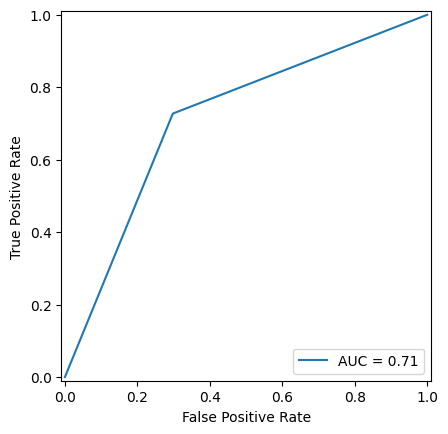

In [70]:
# ROC AUC
print(f"ROC AUC: {roc_auc_score(y_true=y_test, y_score=y_test_pred)}")

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

## Discussion

According to the F1 Score for predicting breast cancer relapse. We can conclude that the model can't predict breast cancer relapse

1. Perform worse than:
   - [2016-Computational Biology and Chemistry-Comparison among dimensionality reduction techniques based on Random Projection for cancer classification](https://www.sciencedirect.com/science/article/abs/pii/S1476927116304108) by 21,88% in accuracy
   - [2021-Front Genet-Predicting Bone Metastasis Using Gene Expression-Based Machine Learning Models](https://pubmed.ncbi.nlm.nih.gov/34858485/) by 20.64% in area under the curve (AUC)